In [26]:
import copy
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import OrderedDict
from scipy.signal import savgol_filter
from utils.plot_utils import set_fontsize
from utils.binning_utils import bin_dataset_switching
from utils.hdf_utils import load_measurement_data_devices_attrs
from utils.plot_utils import plot_binned_dataset_switching
from utils.binning_utils import bin_data, find_nearest_idx, combine_arrays_irregular, \
                                average_binned_data, bin_dataset_switching

In [27]:
fname = "2020_11_13.hdf"
dset_name = "1605294573 rc ratio with P0 F1 and P2 F1 rc"

devices = ()

In [28]:
pmt_channel = 1
shutter_channel = 2

pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

first 2000 shots have barely any signal $\rightarrow$ can't use for averaging

In [29]:
pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pmt_data -= pmt_data[:,150:250].mean(axis = 1)[:, np.newaxis]

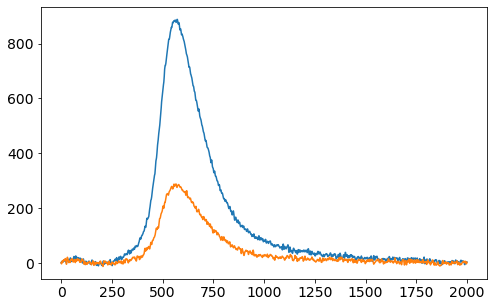

In [30]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(pmt_data[-1000:][1::2].mean(axis = 0))
ax.plot(pmt_data[-1000:][::2].mean(axis = 0))

set_fontsize(ax, 14)

In [31]:
np.trapz(pmt_data[-1000:][1::2].mean(axis = 0)[250:])/np.trapz(pmt_data[-1000:][::2].mean(axis = 0)[250:])

3.012000338187655

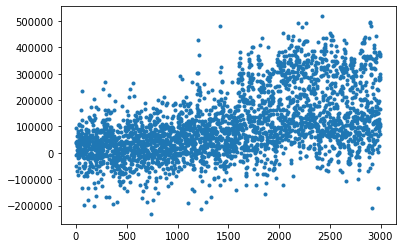

In [32]:
plt.plot(np.trapz(pmt_data[:,200:], axis = 1), '.')

(array([  3.,   3.,  12.,  20.,  39.,  48., 100., 107.,  78.,  47.,  26.,
          9.,   5.,   2.,   1.]),
 array([-132436.12      , -101431.50933333,  -70426.89866667,
         -39422.288     ,   -8417.67733333,   22586.93333333,
          53591.544     ,   84596.15466667,  115600.76533333,
         146605.376     ,  177609.98666667,  208614.59733333,
         239619.208     ,  270623.81866667,  301628.42933333,
         332633.04      ]),
 <BarContainer object of 15 artists>)

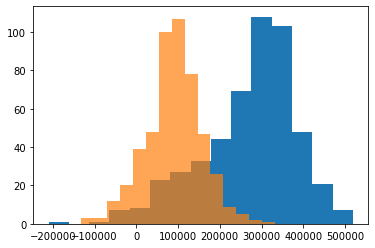

In [39]:
plt.hist(np.trapz(pmt_data[-1000:][1::2][:,250:]), 15)
plt.hist(np.trapz(pmt_data[-1000:][::2][:,250:]), 15, alpha = 0.7)